In [1]:
%cd -q '../'

In [2]:
import pickle
from importlib import reload

import helpers as hp
import pandas as pd

from src.config import *

# reload(hp);
# reload(src.config);

## Loading intermediary files from artifacts

In [3]:
stage_name = "2_MultivariateAnalysis"

with open(
    file=f"notebooks/artifacts/{stage_name}_features_info.pkl", mode="rb"
) as f_write:
    features_info = pickle.load(f_write)

with open(
    file=f"notebooks/artifacts/{stage_name}_df_train.pkl", mode="rb"
) as f_write:
    df_train = pickle.load(f_write)

with open(
    file=f"notebooks/artifacts/{stage_name}_df_test.pkl", mode="rb"
) as f_write:
    df_test = pickle.load(f_write)

del stage_name

# Feature Engineering

In [4]:
# new_derived_ordinal = []
new_derived_numerical = []

df_train['TotalOverall'] = df_train['OverallQ'] + df_train['OverallCond'] # Sum of overall columns from this dataset
df_test['TotalOverall'] = df_test['OverallQ'] + df_test['OverallCond']
df_train['Year_Difference_Remod_Built'] = df_train['YearRemodAdd'] - df_train['YearBuilt']
df_test['Year_Difference_Remod_Built'] = df_test['YearRemodAdd'] - df_test['YearBuilt']
df_train['Year_Difference_Sold_Built'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['Year_Difference_Sold_Built'] = df_test['YrSold'] - df_test['YearBuilt']
df_train['Year_Difference_Sold_Remod'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_test['Year_Difference_Sold_Remod'] = df_test['YrSold'] - df_test['YearRemodAdd']


df_train['TotalHalfBathsAll'] = df_train['BsmtHalfBaths'] + df_train['HalfBaths']
df_test['TotalHalfBathsAll'] = df_test['BsmtHalfBaths'] + df_test['HalfBaths']
df_train['TotalFullBathsAll'] = df_train['BsmtFullBaths'] + df_train['FullBaths']
df_test['TotalFullBathsAll'] = df_test['BsmtFullBaths'] + df_test['FullBaths']
df_train['TotalBathsAll'] = df_train['TotalHalfBathsAll'] + df_train['TotalFullBathsAll']
df_test['TotalBathsAll'] = df_test['TotalHalfBathsAll'] + df_test['TotalFullBathsAll']

# All rooms (above ground and in basement) including bathrooms
df_train['TotalRoomsWithBathsAll'] = df_train['TotalRooms'] + df_train['TotalBathsAll']
df_test['TotalRoomsWithBathsAll'] = df_test['TotalRooms'] + df_test['TotalBathsAll']

# Other rooms above ground
df_train['OtherRooms'] = df_train['TotalRooms'] - df_train['Bedrooms'] - df_train['Kitchens']
df_test['OtherRooms'] = df_test['TotalRooms'] - df_test['Bedrooms'] - df_test['Kitchens']

# Creating ratios with respect to 'TotalRoomsWithBathsAll'
ratios_to_TotalRoomsWithBathsAll = [
    'BsmtFullBaths', 'BsmtHalfBaths', 'FullBaths', 'HalfBaths', 
    'Bedrooms', 'Kitchens', 'OtherRooms', 'TotalHalfBathsAll', 'TotalFullBathsAll',
    'TotalBathsAll'
]
new_derived_numerical_rel_TotalRoomsWithBathsAll = []
for c in ratios_to_TotalRoomsWithBathsAll:
    df_train[f"%{c}"] = df_train[c] / df_train['TotalRoomsWithBathsAll'] * 100
    df_test[f"%{c}"] = df_test[c] / df_test['TotalRoomsWithBathsAll'] * 100
    new_derived_numerical_rel_TotalRoomsWithBathsAll.append(f"%{c}")

df_train['TotalPorchM2'] = df_train['WoodDeckM2'] + df_train['OpenPorchM2'] + df_train['EnclosedPorchM2'] + df_train['3SsnPorchM2'] + df_train['ScreenPorchM2']
df_test['TotalPorchM2'] = df_test['WoodDeckM2'] + df_test['OpenPorchM2'] + df_test['EnclosedPorchM2'] + df_test['3SsnPorchM2'] + df_test['ScreenPorchM2']

df_train['DateSold'] = pd.to_datetime(dict(year=df_train['YrSold'], month=df_train['MoSold'], day=1))
df_test['DateSold'] = pd.to_datetime(dict(year=df_test['YrSold'], month=df_test['MoSold'], day=1))

df_train['OutdoorM2'] = df_train['LotM2'] - df_train['1stFlrM2']
df_test['OutdoorM2'] = df_test['LotM2'] - df_test['1stFlrM2']
df_train['IndoorM2'] = df_train['GrLivM2'] + df_train['TotalBsmtM2'] + df_train['GarageM2']
df_test['IndoorM2'] = df_test['GrLivM2'] + df_test['TotalBsmtM2'] + df_test['GarageM2']
df_train['TotalM2'] = df_train['OutdoorM2'] + df_train['IndoorM2']
df_test['TotalM2'] = df_test['OutdoorM2'] + df_test['IndoorM2']

# Creating ratios with respect to 'IndoorM2'
ratios_to_IndoorM2 = ['1stFlrM2', '2ndFlrM2', 'TotalBsmtM2', 
                      'GarageM2']
new_derived_numerical_rel_M2 = []
for c in ratios_to_IndoorM2:
    df_train[f"%{c}"] = df_train[c] / df_train['IndoorM2'] * 100    
    df_test[f"%{c}"] = df_test[c] / df_test['IndoorM2'] * 100    
    new_derived_numerical_rel_M2.append(f"%{c}")

# Creating ratios with respect to 'TotalM2'
df_train['%OutdoorM2'] = df_train['OutdoorM2'] / df_train['TotalM2'] * 100
df_test['%OutdoorM2'] = df_test['OutdoorM2'] / df_test['TotalM2'] * 100

new_derived_numerical.extend(
    [
        'TotalOverall',
        'Year_Difference_Remod_Built',
        'Year_Difference_Sold_Built',
        'Year_Difference_Sold_Remod'
    ] +

    ['TotalHalfBathsAll',
     'TotalFullBathsAll',
     'TotalBathsAll',
     'TotalRoomsWithBathsAll',
     'OtherRooms'] + 
     new_derived_numerical_rel_TotalRoomsWithBathsAll +
    
    ['TotalPorchM2',
    'OutdoorM2',
    'IndoorM2',
    'TotalM2'] +
    new_derived_numerical_rel_M2 +
    ['%OutdoorM2']
)
# new_derived_ordinal.extend()

# derived_ordinal.extend(new_derived_ordinal)
features_info['numerical'].extend(new_derived_numerical)
features_info['derived_numerical'].extend(new_derived_numerical)
features_info['other'].extend(['DateSold'])

In [5]:
for c in (['Year_Difference_Sold_Built', 'Year_Difference_Sold_Remod'] +
      ['TotalHalfBathsAll', 'TotalFullBathsAll', 'TotalBathsAll',
          'TotalRoomsWithBathsAll', 'OtherRooms']):
    hp.display_feature_name_heading(c)
    display(hp.get_value_counts_freq_with_perc(df_train, c).sort_index())

<h3>'Year_Difference_Sold_Built' feature</h3>

,count,percentage [%]
Year_Difference_Sold_Built,,
0,46,3.938356
1,82,7.020548
2,28,2.397260
3,27,2.311644
4,30,2.568493
...,...,...
127,2,0.171233
128,1,0.085616
129,1,0.085616


<h3>'Year_Difference_Sold_Remod' feature</h3>

,count,percentage [%]
Year_Difference_Sold_Remod,,
0,96,8.219178
1,72,6.164384
2,45,3.852740
3,37,3.167808
4,50,4.280822
...,...,...
56,41,3.510274
57,37,3.167808
58,33,2.825342


<h3>'TotalHalfBathsAll' feature</h3>

,count,percentage [%]
TotalHalfBathsAll,,
0,695,59.503425
1,450,38.527397
2,20,1.712329
3,2,0.171233
4,1,0.085616


<h3>'TotalFullBathsAll' feature</h3>

,count,percentage [%]
TotalFullBathsAll,,
0,1,0.085616
1,295,25.256849
2,602,51.541096
3,255,21.832192
4,14,1.198630
6,1,0.085616


<h3>'TotalBathsAll' feature</h3>

,count,percentage [%]
TotalBathsAll,,
1,180,15.410959
2,469,40.154110
3,378,32.363014
4,133,11.386986
5,6,0.513699
6,2,0.171233


<h3>'TotalRoomsWithBathsAll' feature</h3>

,count,percentage [%]
TotalRoomsWithBathsAll,,
3,1,0.085616
4,2,0.171233
5,46,3.938356
6,103,8.818493
7,164,14.041096
8,228,19.520548
9,208,17.808219
10,163,13.955479
11,112,9.589041


<h3>'OtherRooms' feature</h3>

,count,percentage [%]
OtherRooms,,
0,8,0.684932
1,171,14.640411
2,446,38.184932
3,322,27.568493
4,147,12.585616
5,45,3.852740
6,20,1.712329
7,7,0.599315
8,2,0.171233


<h3>'YearRemodAdd' feature</h3>

Univariate analysis of 'YearRemodAdd' column
Histogram and box plot


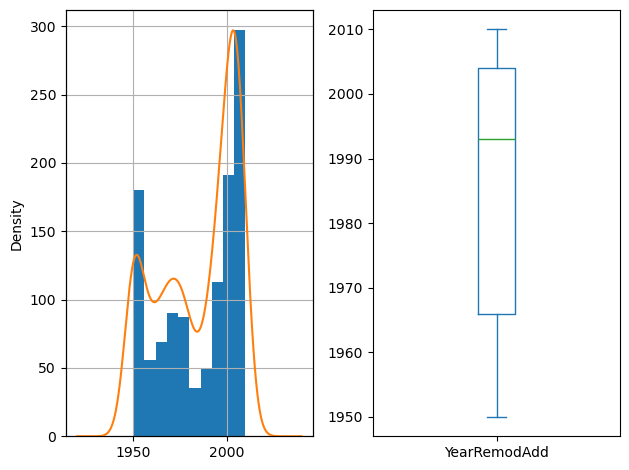

Descriptive statistics


count    1168.000000
mean     1984.488014
std        20.670090
min      1950.000000
25%      1966.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: double[pyarrow]

Variance: 0.010415830357043788
Skewness: -0.46283275918928135
Kurtosis: -1.305944474653702

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'YearBuilt' feature</h3>

Univariate analysis of 'YearBuilt' column
Histogram and box plot


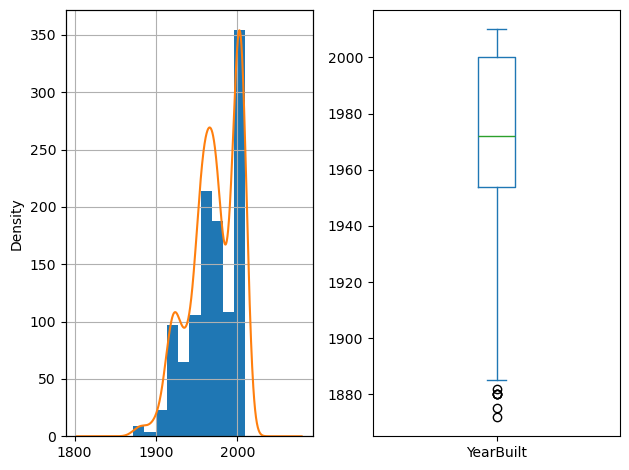

Descriptive statistics


count    1168.000000
mean     1971.234589
std        29.734612
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: double[pyarrow]

Variance: 0.01508425842929091
Skewness: -0.6176686518921982
Kurtosis: -0.33903876600894023

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'YrSold' feature</h3>

Univariate analysis of 'YrSold' column
Histogram and box plot


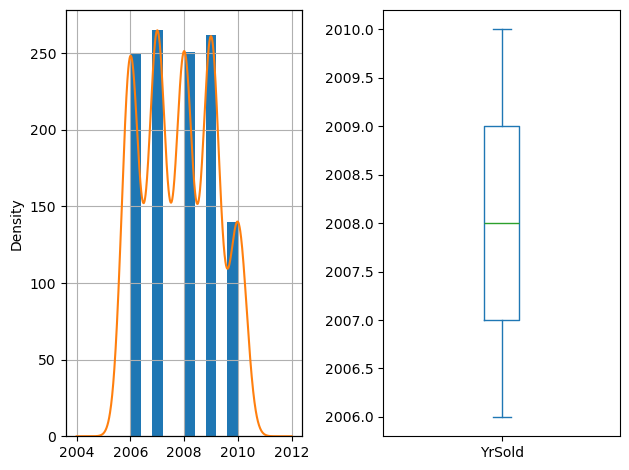

Descriptive statistics


count    1168.000000
mean     2007.809075
std         1.323580
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: double[pyarrow]

Variance: 0.0006592158232723043
Skewness: 0.10948007827669308
Kurtosis: -1.171165815493596

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%BsmtFullBaths' feature</h3>

Univariate analysis of '%BsmtFullBaths' column
Histogram and box plot


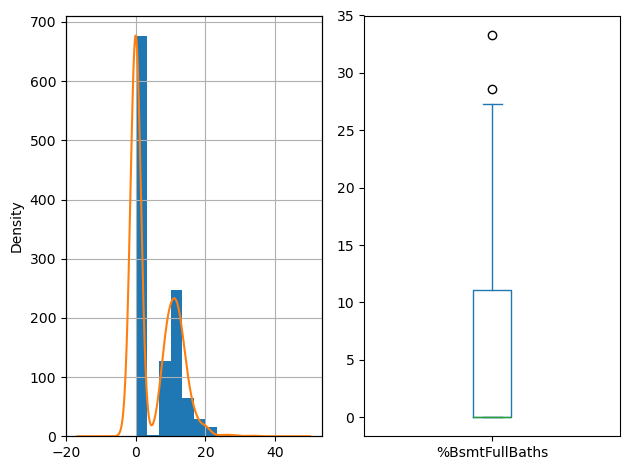

Descriptive statistics


count    1168.000000
mean        4.921283
std         6.170503
min         0.000000
25%         0.000000
50%         0.000000
75%        11.111111
max        33.333333
Name: %BsmtFullBaths, dtype: double[pyarrow]

Variance: 1.2538401826764776
Skewness: 0.7789981753862011
Kurtosis: -0.4571484603755671

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%BsmtHalfBaths' feature</h3>

Univariate analysis of '%BsmtHalfBaths' column
Histogram and box plot


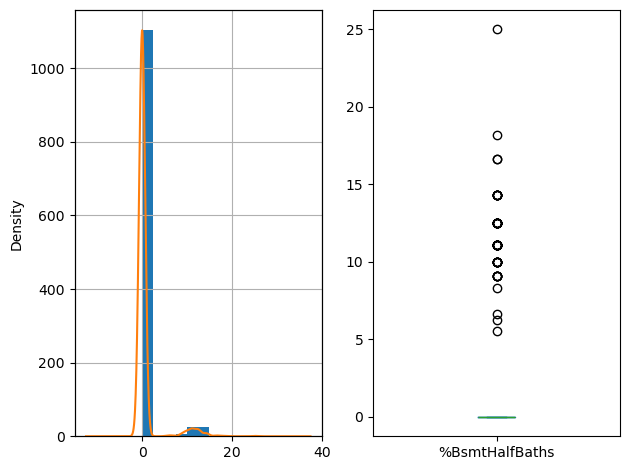

Descriptive statistics


count    1168.000000
mean        0.653716
std         2.773875
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: %BsmtHalfBaths, dtype: double[pyarrow]

Variance: 4.243239629560985
Skewness: 4.321959451121584
Kurtosis: 18.688972285776224

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%FullBaths' feature</h3>

Univariate analysis of '%FullBaths' column
Histogram and box plot


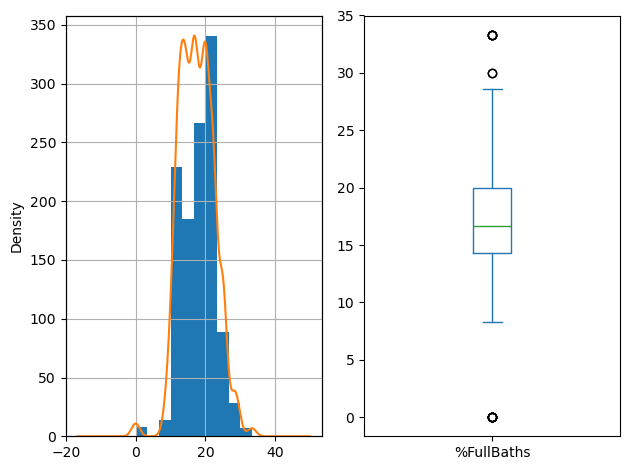

Descriptive statistics


count    1168.000000
mean       17.570082
std         4.840754
min         0.000000
25%        14.285714
50%        16.666667
75%        20.000000
max        33.333333
Name: %FullBaths, dtype: double[pyarrow]

Variance: 0.27551118133259156
Skewness: 0.07467049157950356
Kurtosis: 0.4884681923272547

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%HalfBaths' feature</h3>

Univariate analysis of '%HalfBaths' column
Histogram and box plot


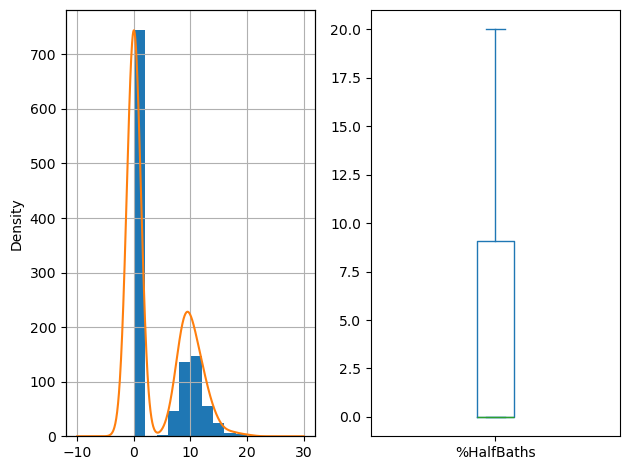

Descriptive statistics


count    1168.000000
mean        3.717778
std         5.109022
min         0.000000
25%         0.000000
50%         0.000000
75%         9.090909
max        20.000000
Name: %HalfBaths, dtype: double[pyarrow]

Variance: 1.3742139289787794
Skewness: 0.8130240322269515
Kurtosis: -0.9286047299929865

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%Bedrooms' feature</h3>

Univariate analysis of '%Bedrooms' column
Histogram and box plot


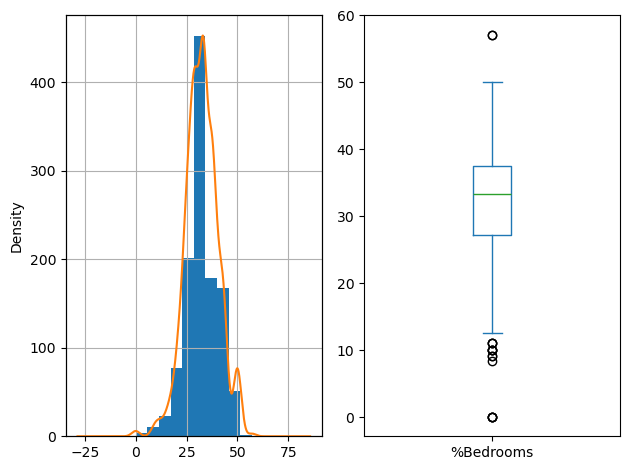

Descriptive statistics


count    1168.000000
mean       32.447340
std         7.986491
min         0.000000
25%        27.272727
50%        33.333333
75%        37.500000
max        57.142857
Name: %Bedrooms, dtype: double[pyarrow]

Variance: 0.24613700116510917
Skewness: -0.13789953344942846
Kurtosis: 0.8629093334546276

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%Kitchens' feature</h3>

Univariate analysis of '%Kitchens' column
Histogram and box plot


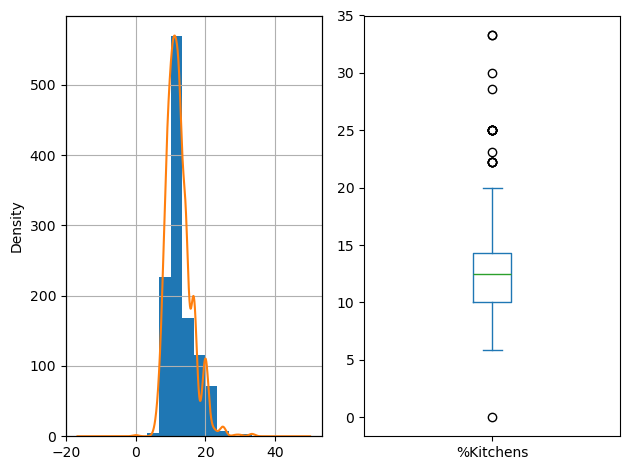

Descriptive statistics


count    1168.000000
mean       12.426313
std         3.577533
min         0.000000
25%        10.000000
50%        12.500000
75%        14.285714
max        33.333333
Name: %Kitchens, dtype: double[pyarrow]

Variance: 0.287899839419992
Skewness: 1.2564507589006164
Kurtosis: 3.098616929126119

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%OtherRooms' feature</h3>

Univariate analysis of '%OtherRooms' column
Histogram and box plot


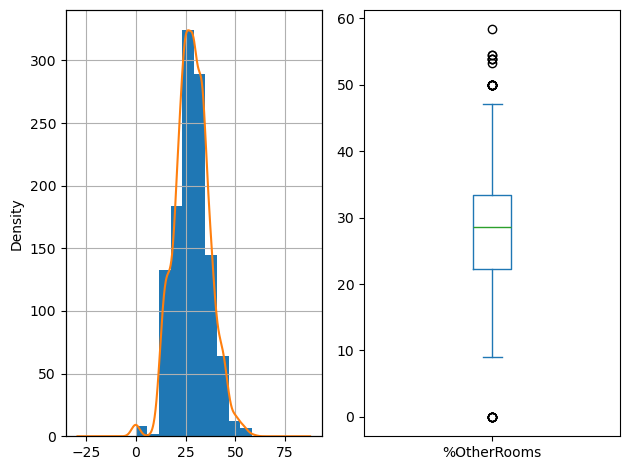

Descriptive statistics


count    1168.000000
mean       28.263488
std         8.564072
min         0.000000
25%        22.222222
50%        28.571429
75%        33.333333
max        58.333333
Name: %OtherRooms, dtype: double[pyarrow]

Variance: 0.3030083328983823
Skewness: 0.07963734198824897
Kurtosis: 0.4357207541239192

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%TotalHalfBathsAll' feature</h3>

Univariate analysis of '%TotalHalfBathsAll' column
Histogram and box plot


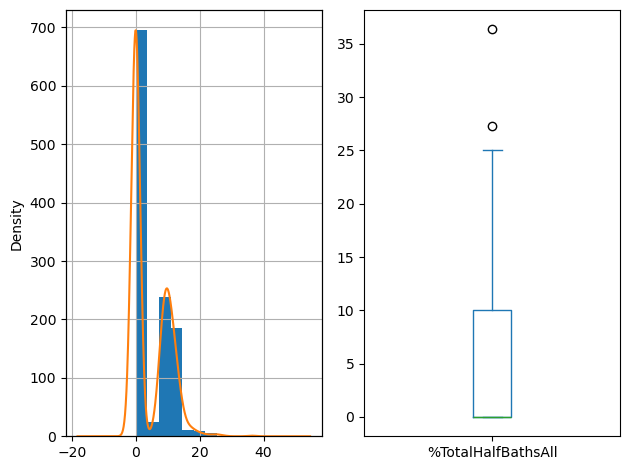

Descriptive statistics


count    1168.000000
mean        4.371494
std         5.658386
min         0.000000
25%         0.000000
50%         0.000000
75%        10.000000
max        36.363636
Name: %TotalHalfBathsAll, dtype: double[pyarrow]

Variance: 1.294382733298759
Skewness: 0.9156667410513251
Kurtosis: 0.2632833144270488

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%TotalFullBathsAll' feature</h3>

Univariate analysis of '%TotalFullBathsAll' column
Histogram and box plot


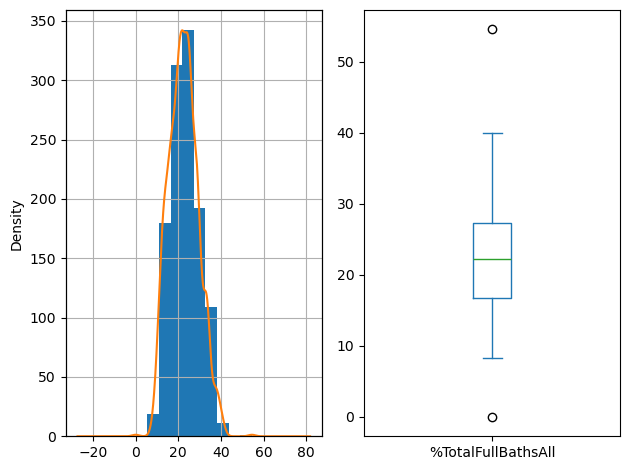

Descriptive statistics


count    1168.000000
mean       22.491365
std         6.775133
min         0.000000
25%        16.666667
50%        22.222222
75%        27.272727
max        54.545455
Name: %TotalFullBathsAll, dtype: double[pyarrow]

Variance: 0.3012326318612682
Skewness: 0.29215734807178173
Kurtosis: -0.03786204046573172

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%TotalBathsAll' feature</h3>

Univariate analysis of '%TotalBathsAll' column
Histogram and box plot


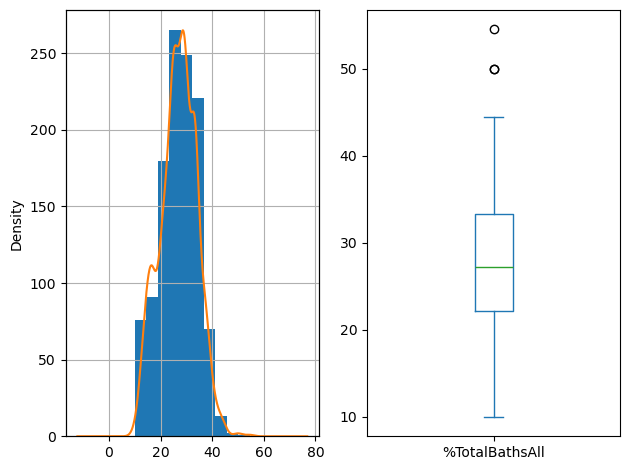

Descriptive statistics


count    1168.000000
mean       26.862859
std         6.954421
min        10.000000
25%        22.222222
50%        27.272727
75%        33.333333
max        54.545455
Name: %TotalBathsAll, dtype: double[pyarrow]

Variance: 0.2588861211283151
Skewness: -0.0317233713452739
Kurtosis: -0.19751032967242965

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'TotalPorchM2' feature</h3>

Univariate analysis of 'TotalPorchM2' column
Histogram and box plot


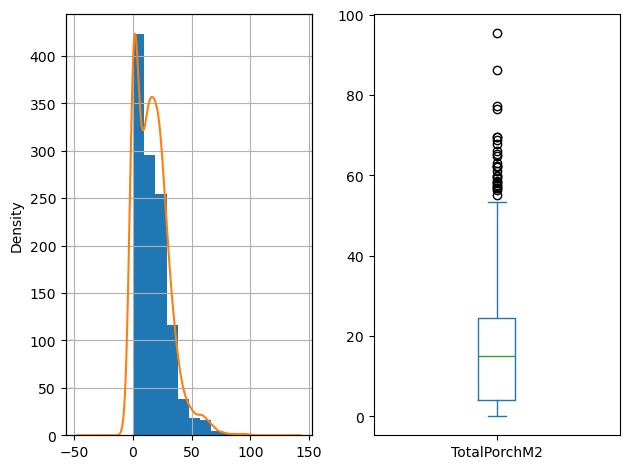

Descriptive statistics


count    1168.000000
mean       16.454815
std        14.452451
min         0.000000
25%         4.087734
50%        15.050292
75%        24.433500
max        95.411422
Name: TotalPorchM2, dtype: double[pyarrow]

Variance: 0.8783113646235677
Skewness: 1.1745212461624976
Kurtosis: 2.1447197042820116

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'OutdoorM2' feature</h3>

Univariate analysis of 'OutdoorM2' column
Histogram and box plot


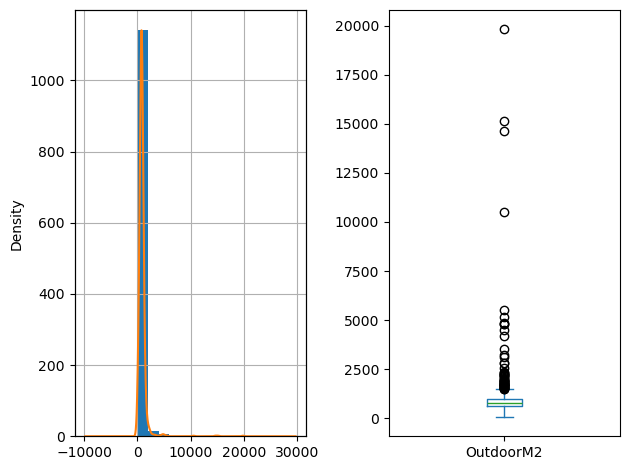

Descriptive statistics


count     1168.000000
mean       876.148287
std        983.506755
min         68.655347
25%        601.640087
50%        771.884908
75%        964.914199
max      19807.764255
Name: OutdoorM2, dtype: double[pyarrow]

Variance: 1.122534585455535
Skewness: 12.352805153143816
Kurtosis: 195.44812827045394

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'IndoorM2' feature</h3>

Univariate analysis of 'IndoorM2' column
Histogram and box plot


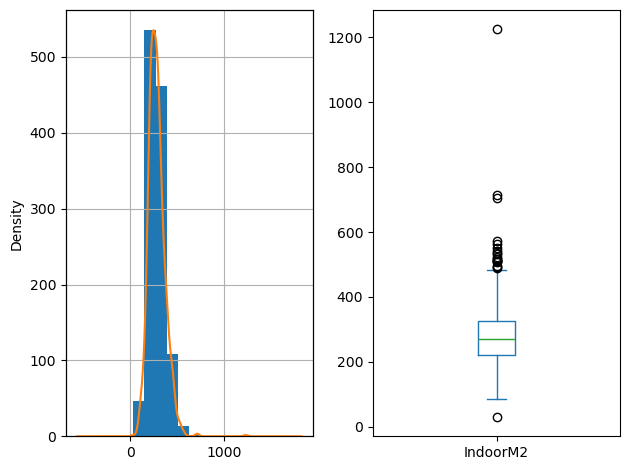

Descriptive statistics


count    1168.000000
mean      280.409293
std        88.407212
min        31.029615
25%       221.434396
50%       270.069137
75%       326.647089
max      1223.533037
Name: IndoorM2, dtype: double[pyarrow]

Variance: 0.31527917911398834
Skewness: 1.6167773363896856
Kurtosis: 11.513002705911603

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'TotalM2' feature</h3>

Univariate analysis of 'TotalM2' column
Histogram and box plot


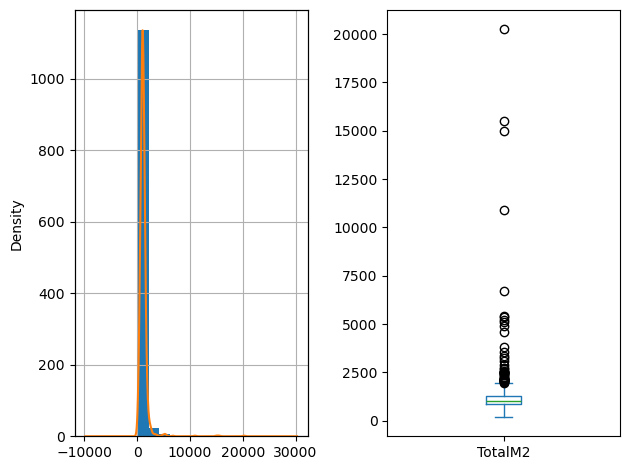

Descriptive statistics


count     1168.000000
mean      1156.557581
std       1010.665786
min        200.949276
25%        847.926046
50%       1044.230170
75%       1288.379359
max      20243.014998
Name: TotalM2, dtype: double[pyarrow]

Variance: 0.8738568688609173
Skewness: 11.717152278775583
Kurtosis: 180.849089329022

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%1stFlrM2' feature</h3>

Univariate analysis of '%1stFlrM2' column
Histogram and box plot


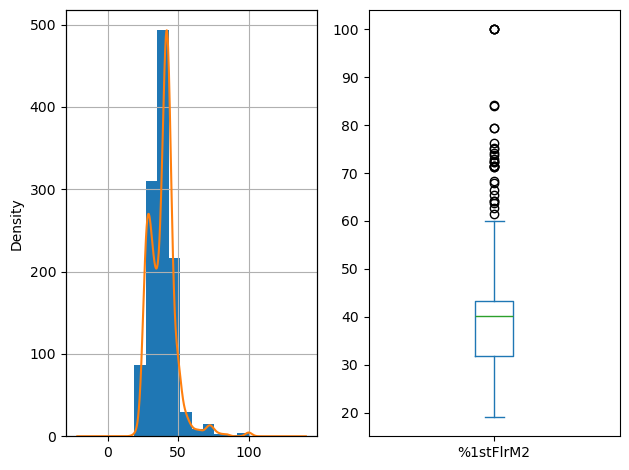

Descriptive statistics


count    1168.000000
mean       39.210604
std         9.569603
min        19.082498
25%        31.713645
50%        40.241071
75%        43.218684
max       100.000000
Name: %1stFlrM2, dtype: double[pyarrow]

Variance: 0.24405649717468447
Skewness: 1.6761968416934752
Kurtosis: 7.128372364877057

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%2ndFlrM2' feature</h3>

Univariate analysis of '%2ndFlrM2' column
Histogram and box plot


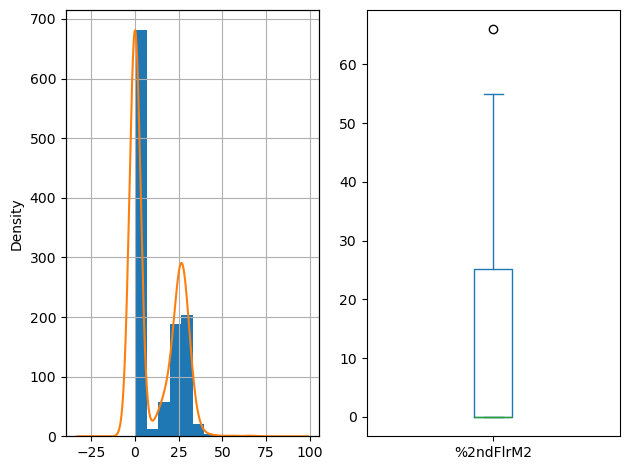

Descriptive statistics


count    1168.000000
mean       10.636568
std        13.100175
min         0.000000
25%         0.000000
50%         0.000000
75%        25.163033
max        65.934066
Name: %2ndFlrM2, dtype: double[pyarrow]

Variance: 1.2316167143452772
Skewness: 0.5892818380865948
Kurtosis: -1.2029473637686876

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%TotalBsmtM2' feature</h3>

Univariate analysis of '%TotalBsmtM2' column
Histogram and box plot


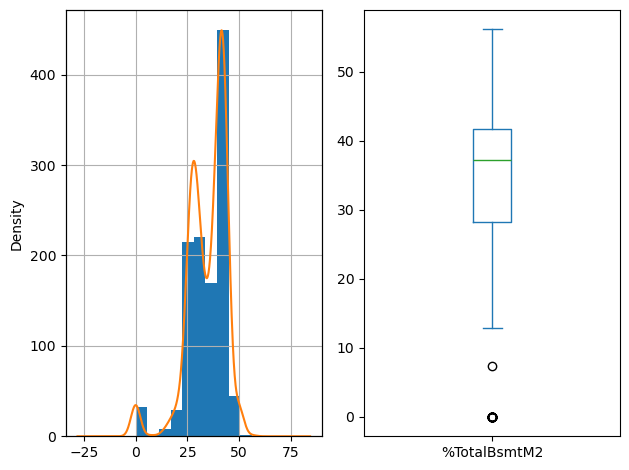

Descriptive statistics


count    1168.000000
mean       34.473729
std         9.405693
min         0.000000
25%        28.192649
50%        37.164362
75%        41.672133
max        56.097988
Name: %TotalBsmtM2, dtype: double[pyarrow]

Variance: 0.27283655814329366
Skewness: -1.3298905092422548
Kurtosis: 2.8348964972687956

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%GarageM2' feature</h3>

Univariate analysis of '%GarageM2' column
Histogram and box plot


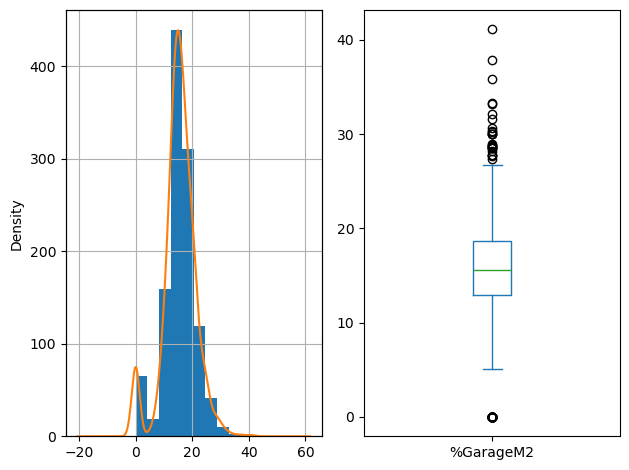

Descriptive statistics


count    1168.000000
mean       15.490159
std         5.783165
min         0.000000
25%        12.972695
50%        15.535882
75%        18.676177
max        41.106719
Name: %GarageM2, dtype: double[pyarrow]

Variance: 0.3733444794709194
Skewness: -0.4047140569697266
Kurtosis: 1.915801796485506

NA values
Count [n]: 0
Percentage [%]: 0.0%


<h3>'%OutdoorM2' feature</h3>

Univariate analysis of '%OutdoorM2' column
Histogram and box plot


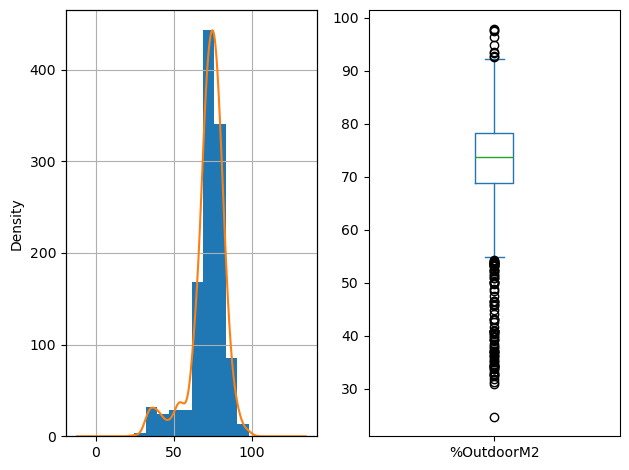

Descriptive statistics


count    1168.000000
mean       71.964609
std        10.947681
min        24.707456
25%        68.777434
50%        73.758042
75%        78.229941
max        97.849872
Name: %OutdoorM2, dtype: double[pyarrow]

Variance: 0.15212589730415293
Skewness: -1.5211227532583464
Kurtosis: 3.2119283152416322

NA values
Count [n]: 0
Percentage [%]: 0.0%


In [6]:
for c in (['YearRemodAdd', 'YearBuilt', 'YrSold']
          + new_derived_numerical_rel_TotalRoomsWithBathsAll
          + ['TotalPorchM2', 'OutdoorM2', 'IndoorM2', 'TotalM2']
          + new_derived_numerical_rel_M2
          + ['%OutdoorM2']):
    hp.display_feature_name_heading(c)    
    hp.show_hist_box_numerical_col(df_train, c)

In [7]:
stage_name = "3_FeatureEngineering"

with open(
    file=f"notebooks/artifacts/{stage_name}_features_info.pkl", mode="wb"
) as file:
    pickle.dump(features_info, file)

df_train.to_pickle(path=f"notebooks/artifacts/{stage_name}_df_train.pkl")
df_test.to_pickle(path=f"notebooks/artifacts/{stage_name}_df_test.pkl")

del stage_name